Final learned weights: w_0 = 4.416942895683475 , w_1 = 2.9405346270770547


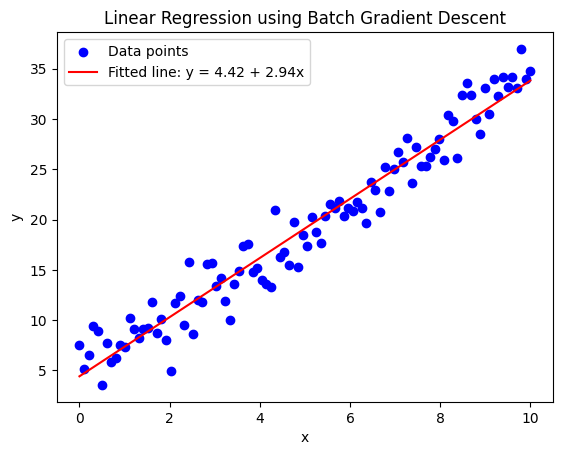

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generating some data points based on the equation y = 4 + 3x
np.random.seed(0)  # For reproducibility
X = np.linspace(0, 10, 100)  # 100 data points from 0 to 10
y = 4 + 3 * X  # Linear relationship: y = 4 + 3x


# Adding some noise to the data (optional)
y += np.random.randn(100) * 2  # Add Gaussian noise to make it a bit more realistic

# Reshaping X for matrix operations (add a column of 1s for bias term w_0)
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Adding a column of 1s for bias (w_0)

# Parameters
initial_weights = np.array([0.0, 0.0])  # w_0 and w_1 initialized to 0
learning_rate = 0.001
iterations = 1000000

# Batch Gradient Descent function
def batch_gradient_descent(X_b, y, weights, learning_rate, iterations):
    N = len(y)  # Number of samples
    for i in range(iterations):
        predictions = np.dot(X_b, weights)  # Make predictions
        errors = predictions - y  # Calculate the error (predictions - actual)
        gradient = (2 / N) * np.dot(X_b.T, errors)  # Calculate the gradient
        weights = weights - learning_rate * gradient  # Update weights
    return weights

# Running the gradient descent
final_weights = batch_gradient_descent(X_b, y, initial_weights, learning_rate, iterations)

# Output learned weights
print("Final learned weights: w_0 =", final_weights[0], ", w_1 =", final_weights[1])

# Plotting the results
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, X_b.dot(final_weights), color='red', label='Fitted line: y = {:.2f} + {:.2f}x'.format(final_weights[0], final_weights[1]))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression using Batch Gradient Descent')
plt.show()


example form page 18 lec 3

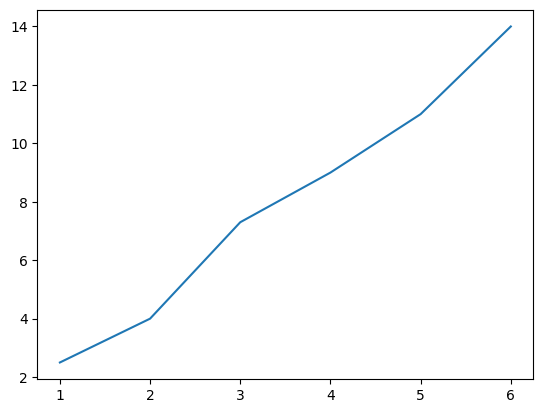

[-0.05333333  2.29142857]
18.278095238095226


In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5,6])
X = np.c_[np.ones((x.shape[0], 1)), x]  # Adding a column of 1s for bias (w_0)
y = np.array([2.5,4,7.3,9,11,14])

plt.plot(x,y)
plt.show()

#calculate Residuals sum of squares

w_ols = np.linalg.inv(X.T @ X) @ X.T @ y

print(w_ols)

#predict y for x = 8
y_pred = w_ols[0] + w_ols[1] * 8
print(y_pred)



Accuracy: 100.00%


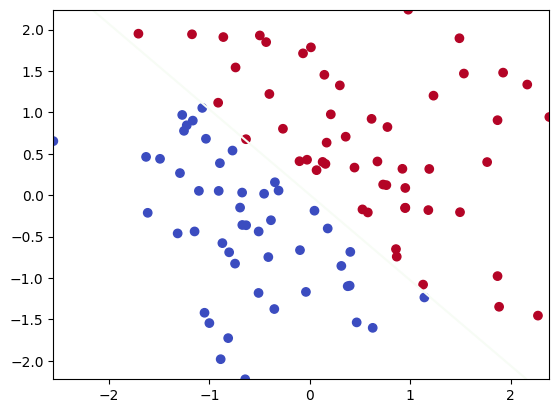

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression model
def predict(X, weights):
    z = np.dot(X, weights)
    return sigmoid(z)

# Gradient descent for logistic regression
def logistic_regression(X, y, learning_rate=0.01, epochs=1000):
    # Initialize weights
    weights = np.zeros(X.shape[1])
    m = len(y)
    
    # Gradient descent loop
    for _ in range(epochs):
        # Prediction
        predictions = predict(X, weights)
        
        # Compute the gradient (partial derivative of the cost function)
        gradient = np.dot(X.T, (predictions - y)) / m
        
        # Update weights
        weights -= learning_rate * gradient
    
    return weights

# Generating synthetic data for binary classification
np.random.seed(0)
X = np.random.randn(100, 2)  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Binary labels (0 or 1)

# Add intercept term (bias) to feature matrix
X_with_bias = np.c_[np.ones(X.shape[0]), X]

# Train the logistic regression model
weights = logistic_regression(X_with_bias, y, learning_rate=0.1, epochs=10000)

# Predictions on the training set
predictions = predict(X_with_bias, weights)
predictions_class = (predictions >= 0.5).astype(int)

# Accuracy of the model
accuracy = np.mean(predictions_class == y)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
grid = np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()]
probs = predict(grid, weights).reshape(xx.shape)
plt.contour(xx, yy, probs, levels=[0.5], cmap="Greens")
plt.show()
